# Colab set-up

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google'

In [ ]:
import os
# If the path differs, don't forget to change it
os.chdir("/content/gdrive/MyDrive/DT2219-lab3")

In [ ]:
!ls

In [ ]:
import sys
sys.path.append('/content/gdrive/MyDrive/DT2219-lab3')

In [ ]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

In [ ]:
!pip3 install -r requirements.txt

# Imports, etc.

In [1]:
import matplotlib.pyplot as plt
import os
import torch
from os.path import exists

from lab3_tools import *
from lab3_proto import words2phones
from lab1_proto import *
from lab2_tools import *
from lab2_proto import *

# 3) Data

In [2]:
# Get whole dataset from AFS

In [3]:
path2info('tidigits/disc_4.1.1/tidigits/train/man/ae/z9z6531a.wav')

('man', 'ae', 'z9z6531', 'a')

In [4]:
loadAudio('tidigits/disc_4.1.1/tidigits/train/man/ae/z9z6531a.wav')

(array([11, 13, 11, ...,  9,  9,  9], dtype=int16), 20000)

# 4) Preparing the Data for DNN Training

In [5]:
lab2_models = 'lab2_models_all.npz'
phoneHMMs = np.load(lab2_models, allow_pickle=True)['phoneHMMs'].item()
phones = sorted(phoneHMMs.keys())
nstates = {phone: phoneHMMs[phone]['means'].shape[0] for phone in phones}
stateList = [ph + '_' + str(id) for ph in phones for id in range(nstates[ph])]
stateList

['ah_0',
 'ah_1',
 'ah_2',
 'ao_0',
 'ao_1',
 'ao_2',
 'ay_0',
 'ay_1',
 'ay_2',
 'eh_0',
 'eh_1',
 'eh_2',
 'ey_0',
 'ey_1',
 'ey_2',
 'f_0',
 'f_1',
 'f_2',
 'ih_0',
 'ih_1',
 'ih_2',
 'iy_0',
 'iy_1',
 'iy_2',
 'k_0',
 'k_1',
 'k_2',
 'n_0',
 'n_1',
 'n_2',
 'ow_0',
 'ow_1',
 'ow_2',
 'r_0',
 'r_1',
 'r_2',
 's_0',
 's_1',
 's_2',
 'sil_0',
 'sil_1',
 'sil_2',
 'sp_0',
 't_0',
 't_1',
 't_2',
 'th_0',
 'th_1',
 'th_2',
 'uw_0',
 'uw_1',
 'uw_2',
 'v_0',
 'v_1',
 'v_2',
 'w_0',
 'w_1',
 'w_2',
 'z_0',
 'z_1',
 'z_2']

In [6]:
stateList.index('ay_2')

8

In [7]:
target_class_file_name = "targetClass.txt"
if exists(target_class_file_name):
    print(f"{target_class_file_name} exists, skipping its creation.")
else:
    with open(target_class_file_name, "w") as txt_file:
        for entry in stateList:
            txt_file.write(f"{entry}\n")

targetClass.txt exists, skipping its creation.


In [8]:
# Checking a file content
!cat targetClass.txt

ah_0
ah_1
ah_2
ao_0
ao_1
ao_2
ay_0
ay_1
ay_2
eh_0
eh_1
eh_2
ey_0
ey_1
ey_2
f_0
f_1
f_2
ih_0
ih_1
ih_2
iy_0
iy_1
iy_2
k_0
k_1
k_2
n_0
n_1
n_2
ow_0
ow_1
ow_2
r_0
r_1
r_2
s_0
s_1
s_2
sil_0
sil_1
sil_2
sp_0
t_0
t_1
t_2
th_0
th_1
th_2
uw_0
uw_1
uw_2
v_0
v_1
v_2
w_0
w_1
w_2
z_0
z_1
z_2


## Forced alignment of single sample

In [9]:
filename = 'tidigits/disc_4.1.1/tidigits/train/man/nw/z43a.wav'
samples, samplingrate = loadAudio(filename)
lmfcc = mfcc(samples)

In [10]:
steps = np.load("lab3_example.npz", allow_pickle=True)['example'].item()

In [11]:
np.sum(lmfcc - steps['lmfcc'])

7.61258764359063e-12

In [12]:
wordTrans = list(path2info(filename)[2])
wordTrans

['z', '4', '3']

In [13]:
# Get the phoneme transcription of a sequence of words
from prondict import prondict
phoneTrans = words2phones(wordTrans, prondict)
phoneTrans

['sil',
 'z',
 'iy',
 'r',
 'ow',
 'sp',
 'f',
 'ao',
 'r',
 'sp',
 'th',
 'r',
 'iy',
 'sp',
 'sil']

In [14]:
utteranceHMM = concatHMMs(phoneHMMs, phoneTrans)

In [15]:
# Splitting phonemes (in our case) into three components, execept short pause (sp) which has just one
stateTrans = [phone + '_' + str(stateid) for phone in phoneTrans for stateid in range(nstates[phone])]
stateTrans

['sil_0',
 'sil_1',
 'sil_2',
 'z_0',
 'z_1',
 'z_2',
 'iy_0',
 'iy_1',
 'iy_2',
 'r_0',
 'r_1',
 'r_2',
 'ow_0',
 'ow_1',
 'ow_2',
 'sp_0',
 'f_0',
 'f_1',
 'f_2',
 'ao_0',
 'ao_1',
 'ao_2',
 'r_0',
 'r_1',
 'r_2',
 'sp_0',
 'th_0',
 'th_1',
 'th_2',
 'r_0',
 'r_1',
 'r_2',
 'iy_0',
 'iy_1',
 'iy_2',
 'sp_0',
 'sil_0',
 'sil_1',
 'sil_2']

In [16]:
obsloglik = log_multivariate_normal_density_diag(
    lmfcc, utteranceHMM['means'], utteranceHMM['covars']
)

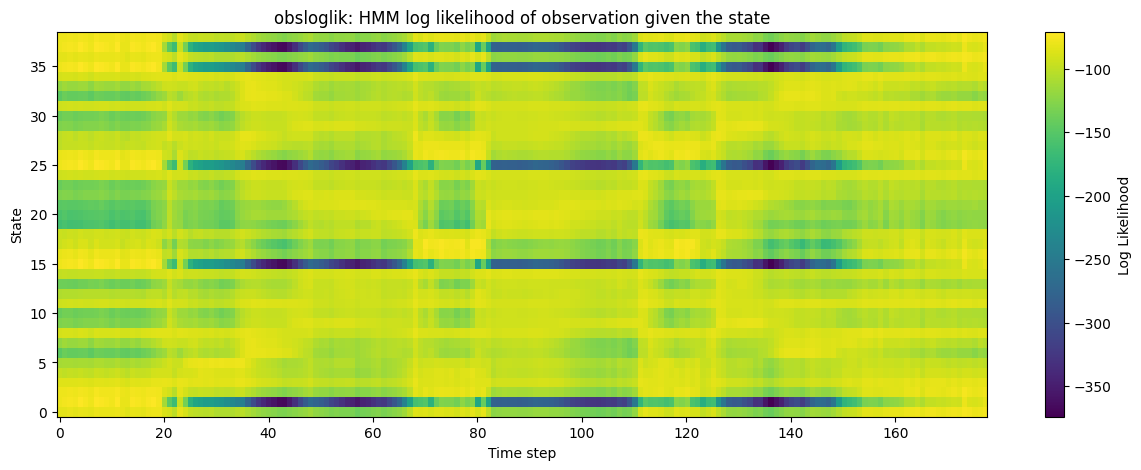

In [17]:
# 5 bars - silence, 3x short silence, silence
# which we expect
plt.figure(figsize=(15, 5))
plt.imshow(obsloglik.T, aspect='auto', origin='lower', cmap='viridis', interpolation='none')
plt.colorbar(label='Log Likelihood')
plt.xlabel('Time step')
plt.ylabel('State')
plt.title('obsloglik: HMM log likelihood of observation given the state')
plt.show()

In [18]:
startprob = utteranceHMM['startprob']
transmat = utteranceHMM['transmat']

viterbi_loglik, viterbi_path = viterbi(obsloglik, np.log(startprob), np.log(transmat))

/tmp/ipykernel_11760/687773586.py:4: RuntimeWarning: divide by zero encountered in log
  viterbi_loglik, viterbi_path = viterbi(obsloglik, np.log(startprob), np.log(transmat))


In [19]:
logalpha = forward(obsloglik, np.log(startprob), np.log(transmat))

/tmp/ipykernel_11760/582359088.py:1: RuntimeWarning: divide by zero encountered in log
  logalpha = forward(obsloglik, np.log(startprob), np.log(transmat))


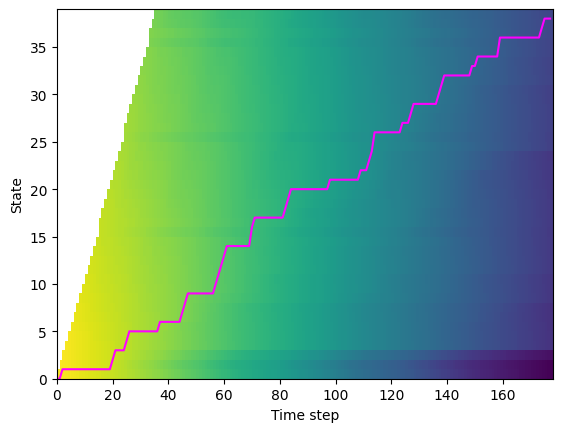

In [20]:
plt.pcolormesh(logalpha.T)
plt.plot(viterbi_path.T, color="magenta")
plt.xlabel('Time step')
plt.ylabel('State')
plt.show()

In [21]:
viterbiStateTrans = [stateTrans[i] for i in viterbi_path]
viterbiStateTrans

['sil_0',
 'sil_0',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_2',
 'z_0',
 'z_0',
 'z_0',
 'z_0',
 'z_1',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'iy_0',
 'iy_0',
 'iy_0',
 'iy_0',
 'iy_0',
 'iy_0',
 'iy_0',
 'iy_0',
 'iy_1',
 'iy_2',
 'r_0',
 'r_0',
 'r_0',
 'r_0',
 'r_0',
 'r_0',
 'r_0',
 'r_0',
 'r_0',
 'r_0',
 'r_1',
 'r_2',
 'ow_0',
 'ow_1',
 'ow_2',
 'ow_2',
 'ow_2',
 'ow_2',
 'ow_2',
 'ow_2',
 'ow_2',
 'ow_2',
 'ow_2',
 'f_0',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_2',
 'ao_0',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'r_0',
 'r_0',
 'r_0',
 'r_1',
 'r_2',

In [22]:
frames2trans(viterbiStateTrans, outfilename='z43a.lab')

'0 0.02 sil_0\n0.02 0.20000000000000004 sil_1\n0.20000000000000004 0.21000000000000005 sil_2\n0.21000000000000005 0.25000000000000006 z_0\n0.25000000000000006 0.26000000000000006 z_1\n0.26000000000000006 0.37000000000000016 z_2\n0.37000000000000016 0.45000000000000023 iy_0\n0.45000000000000023 0.46000000000000024 iy_1\n0.46000000000000024 0.47000000000000025 iy_2\n0.47000000000000025 0.5700000000000003 r_0\n0.5700000000000003 0.5800000000000003 r_1\n0.5800000000000003 0.5900000000000003 r_2\n0.5900000000000003 0.6000000000000003 ow_0\n0.6000000000000003 0.6100000000000003 ow_1\n0.6100000000000003 0.7000000000000004 ow_2\n0.7000000000000004 0.7100000000000004 f_0\n0.7100000000000004 0.8200000000000005 f_1\n0.8200000000000005 0.8300000000000005 f_2\n0.8300000000000005 0.8400000000000005 ao_0\n0.8400000000000005 0.9800000000000006 ao_1\n0.9800000000000006 1.0900000000000007 ao_2\n1.0900000000000007 1.1200000000000008 r_0\n1.1200000000000008 1.1300000000000008 r_1\n1.1300000000000008 1.140

Is the alignment correct?
- Yes.

What can you say observing the alignment between the sound file and the classes?
- It fits?

![2024-05-03 14_59_30-lab3.pdf - Personal - Microsoft​ Edge.png](attachment:23de2d63-090f-4177-8e14-5af810881119.png)

## Feature extraction, forced alignment of datasets

In [23]:
train_file_name = 'traindata.npz'
if exists(train_file_name):
        print(f"{train_file_name} exists, skipping its creation.")
else:
    traindata = []
    for root, dirs, files in os.walk('tidigits/disc_4.1.1/tidigits/train'):
        for file in files:
            if file.endswith('.wav'):
                filename = os.path.join(root, file)
                samples, samplingrate = loadAudio(filename)

                # Feature extraction
                lmfcc = mfcc(samples)
                mspec_1 = mspec(samples)

                # Forced alignment
                wordTrans = list(path2info(filename)[2])
                phoneTrans = words2phones(wordTrans, prondict)
                utteranceHMM = concatHMMs(phoneHMMs, phoneTrans)
                stateTrans = [phone + '_' + str(stateid) for phone in phoneTrans for stateid in range(nstates[phone])]
                # Emission likelihoods
                obsloglik = log_multivariate_normal_density_diag(
                    lmfcc, utteranceHMM['means'], utteranceHMM['covars']
                )
                # Viterbi
                startprob = utteranceHMM['startprob']
                transmat = utteranceHMM['transmat']
                viterbi_loglik, viterbi_path = viterbi(obsloglik, np.log(startprob), np.log(transmat))
                # Final targets
                targets = [stateList.index(stateTrans[i]) for i in viterbi_path]

                traindata.append({'filename': filename, 'lmfcc': lmfcc, 'mspec': mspec_1, 'targets': targets})
    np.savez(train_file_name, traindata=traindata)

traindata.npz exists, skipping its creation.


In [24]:
file_name = 'testdata.npz'
if exists(file_name):
        print(f"{file_name} exists, skipping its creation.")
else:
    testdata = []
    for root, dirs, files in os.walk('tidigits/disc_4.2.1/tidigits/test'):
        for file in files:
            if file.endswith('.wav'):
                filename = os.path.join(root, file)
                samples, samplingrate = loadAudio(filename)

                # Feature extraction
                lmfcc = mfcc(samples)
                mspec_1 = mspec(samples)

                # Forced alignment
                wordTrans = list(path2info(filename)[2])
                phoneTrans = words2phones(wordTrans, prondict)
                utteranceHMM = concatHMMs(phoneHMMs, phoneTrans)
                stateTrans = [phone + '_' + str(stateid) for phone in phoneTrans for stateid in range(nstates[phone])]
                # Emission likelihoods
                obsloglik = log_multivariate_normal_density_diag(
                    lmfcc, utteranceHMM['means'], utteranceHMM['covars']
                )
                # Viterbi
                startprob = utteranceHMM['startprob']
                transmat = utteranceHMM['transmat']
                viterbi_loglik, viterbi_path = viterbi(obsloglik, np.log(startprob), np.log(transmat))
                # Final targets
                targets = [stateList.index(stateTrans[i]) for i in viterbi_path]

                testdata.append({'filename': filename, 'lmfcc': lmfcc, 'mspec': mspec_1, 'targets': targets})
    np.savez(file_name, testdata=testdata)

testdata.npz exists, skipping its creation.


## 4.4 Training and validation sets

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit

training_data = np.load(train_file_name, allow_pickle=True)['traindata']

genders = [path2info(training_entry['filename'])[0] for training_entry in training_data]

# TODO: ensure each speaker is in one set only
# We want to generate just a single split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
for train_index, test_index in sss.split(training_data, genders):
    training_set = np.array([training_data[i] for i in train_index])
    validation_set = np.array([training_data[i] for i in test_index])

# Validate the split size
print("Training set size: ", training_set.shape[0]/training_data.shape[0])
print("Validation set size: ", validation_set.shape[0]/training_data.shape[0])

# Validate the gender distribution
training_set_man_genders = np.sum([path2info(entry['filename'])[0] == 'man' for entry in training_set])
validation_set_man_genders = np.sum([path2info(entry['filename'])[0] == 'man' for entry in validation_set])

print("Training set 'man' ratio: ", training_set_man_genders/training_set.shape[0])
print("Validation set 'man' ratio: ", validation_set_man_genders/validation_set.shape[0])

training_ids = [path2info(entry['filename'])[1] for entry in training_set]
validation_ids = [path2info(entry['filename'])[1] for entry in validation_set]
#np.all([np.isin(training_entry, validation_ids) for training_entry in training_ids])
np.intersect1d(training_ids,validation_ids).shape

Training set size:  0.8999188217557694
Validation set size:  0.10008117824423055
Training set 'man' ratio:  0.4911082474226804
Validation set 'man' ratio:  0.49130938586326767


(112,)

Explain how you selected the two data sets.


In [26]:
# Test data
test_set = np.load(file_name, allow_pickle=True)['testdata']

In [27]:
# Create y sets (using targets from sets)
train_y = np.concatenate([entry['targets'] for entry in training_set], axis=0)
val_y = np.concatenate([entry['targets'] for entry in validation_set], axis=0)
test_y = np.concatenate([entry['targets'] for entry in test_set], axis=0)

# Validate the correct order in y
assert np.array_equal(training_set[0]['targets'], train_y[:len(training_set[0]['targets'])])

train_y.shape, val_y.shape, test_y.shape

((1353209,), (154183,), (1527014,))

## 4.5 Acoustic Context (Dynamic Features)

In [28]:
# For each entry in training and validation set
# Go through 'mfcc' and 'mspec' attributes
# Resulting in e.g. lmfcc_i = (lmfcc_i-2, lmfcc_i-1, lmfcc_i, lmfcc_i+1, lmfcc_i+2)
# If i=0, then lmfcc_i = (lmfcc_i+2, lmfcc_i+1, lmfcc_i, lmfcc_i+1, lmfcc_i+2)

def stack_features(dataset, feature='lmfcc', window_size=3):
    full_window_size = 1 + 2 * window_size
    new_dataset = []
    for entry in dataset:
        entry_feature = entry[feature]
        num_timesteps, num_features = entry_feature.shape
        stacked_features = np.zeros((num_timesteps, full_window_size * num_features))

        for t in range(num_timesteps):
            # Go from -3 to +3 feature
            for w in range(-window_size, window_size + 1):
                # If the window goes off the edge of the array, use the edge value.
                if t + w < 0:
                    # Not the same as abs(t+w)
                    value_to_be_assigned = entry_feature[t + abs(w)]
                elif t + w >= num_timesteps:
                    # Apparently correct - a lot of calculations that "make" sense
                    value_to_be_assigned = entry_feature[2*(num_timesteps - 1) - (t+w)] 
                else:
                    value_to_be_assigned = entry_feature[t + w]
                stacked_features[t, (w + window_size) * num_features : (w + window_size + 1) * num_features] = value_to_be_assigned
        new_dataset.append(stacked_features)
    # Can't return as np.array due to different lengths
    return new_dataset

## 4.6  Feature Standardisation

In [29]:
# Choose a standardization startegy
# - The assignment makes is seem like we should do 1. (whole training set)

# Input must be flattened _before_ entered into the Scaler if we want to standardize over the whole training set
from sklearn.preprocessing import StandardScaler

def standardize_datasets(train_x, val_x, test_x):
  scaler = StandardScaler()

  # save the normalisation coefficients
  scaler.fit(train_x)
  # normalise over the whole training set
  d_lmfcc_train_x = scaler.transform(train_x)
  # normalise the validation and test set
  d_lmfcc_val_x = scaler.transform(val_x)
  d_lmfcc_test_x = scaler.transform(test_x)
  return d_lmfcc_train_x, d_lmfcc_val_x, d_lmfcc_test_x

Think about the implications of these different strategies:
1. normalise over the whole training set,
2. normalise over each speaker separately, or
3. normalise each utterance individually.

In the third case, what will happen
with the very short utterances in the files containing isolated digits?
- Answer

In [30]:
def prepare_x(feature='lmfcc', dynamic=True):
    # Once the features are standardised, for each of the training, validation and test sets, flatten
    # the data structures, that is, concatenate all the feature matrices so that you obtain a single matrix
    # per set that is N × D, where D is the dimension of the features and N is the total number of
    # frames in each of the sets.
    if dynamic:
        train_x = np.concatenate(stack_features(training_set, feature=feature), axis=0)
        val_x = np.concatenate(stack_features(validation_set, feature=feature), axis=0)
        test_x = np.concatenate(stack_features(test_set, feature=feature), axis=0)
    else:
        train_x = np.concatenate([entry[feature] for entry in training_set], axis=0)
        val_x = np.concatenate([entry[feature] for entry in validation_set], axis=0)
        test_x = np.concatenate([entry[feature] for entry in test_set], axis=0)
        # Validate the correct order in x
        assert np.array_equal(training_set[0][feature], train_x[:len(training_set[0][feature])])

    # Printing of expected partition shapes
    print("train_x: ", train_x.shape)
    print("val_x: ", val_x.shape)
    print("test_x: ", test_x.shape)

    s_train_x, s_val_x, s_test_x = standardize_datasets(train_x, val_x, test_x)

    return s_train_x, s_val_x, s_test_x

In [31]:
# target arrays into a one-hot encoding
import torch.nn.functional as F
output_dim = len(stateList)
train_y = F.one_hot(torch.tensor(train_y),num_classes=output_dim)
val_y = F.one_hot(torch.tensor(val_y),num_classes=output_dim)

In [32]:
train_y.shape

torch.Size([1353209, 61])

## 5  Phoneme Recognition with Deep Neural Networks

In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
# from torch.utils.tensorboard import SummaryWriter
import numpy as np

# Define the neural network architecture
class PhonemeRecognitionModel(nn.Module):
    def __init__(self, input_size, output_size, hidden_size=256, num_layers=1):
        super(PhonemeRecognitionModel, self).__init__()
        self.layers = nn.ModuleList([nn.Linear(input_size, hidden_size)])
        self.layers.extend([nn.Linear(hidden_size, hidden_size) for _ in range(num_layers - 1)])
        self.layers.append(nn.Linear(hidden_size, output_size))
        self.activation = nn.ReLU()  # ReLU activation function, non-linearity

    def forward(self, x):
        for i, layer in enumerate(self.layers[:-1]):
            x = self.activation(layer(x))
        x = self.layers[-1](x)  # Output layer without activation
        return x

In [34]:
# TODO: we need all four configurations mentioned under 5.
# Parameters (this would be configuration 3. "same as 1. but with dynamic features as explained in Section 4.5")

def train_model(model_file_path, train_x, val_x, train_y, val_y):
    input_size = train_x.shape[1] # Example: number of features - for dynamic MFCCs 91 in our case
    output_size = len(stateList)  # Number of phoneme states
    hidden_size = 256 # Batch size
    num_layers = 2
    
    # Instantiate the model
    model = PhonemeRecognitionModel(input_size, output_size, hidden_size, num_layers)
    
    # Convert data to tensors
    train_x = torch.tensor(train_x.astype(np.float32))
    train_y = train_y.clone().detach()
    val_x = torch.tensor(val_x.astype(np.float32))
    val_y = val_y.clone().detach()
    
    # Create datasets from tensors
    train_dataset = TensorDataset(train_x, train_y)
    train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
    val_dataset = TensorDataset(val_x, val_y)
    val_loader = DataLoader(val_dataset, batch_size=256, shuffle=False)
    
    # Define loss and optimizer (CrossEntropyLoss + Adam, for instance)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters())
    
    # setup logging so that you can follow training using TensorBoard (see https://pytorch.org/docs/stable/tensorboard.html)
    # writer = SummaryWriter()
    
    # Training and validation loop (from 'pytorch_example.py')
    num_epochs = 3
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
    
            # Convert labels from one-hot to indices if not already done before the loop
            labels_indices = torch.argmax(labels, dim=1) if labels.dim() > 1 else labels
    
            outputs = model(inputs)
            loss = criterion(outputs, labels_indices)  # Use indices, not one-hot labels
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
    
        model.eval()
        val_loss = 0.0
        state_correct = 0
        test_total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                # Same label conversion for validation
                labels_indices = torch.argmax(labels, dim=1) if labels.dim() > 1 else labels
                outputs = model(inputs)
                loss = criterion(outputs, labels_indices)
                val_loss += loss.item()
    
                _, predicted = torch.max(outputs.data, 1)
                test_total += labels_indices.size(0)
                state_correct += (predicted == labels_indices).sum().item()
    
        train_loss /= len(train_loader)
        val_loss /= len(val_loader)
        state_accuracy = 100 * state_correct / test_total
        print(f'Epoch {epoch+1}: train_loss={train_loss:.4f}, val_loss={val_loss:.4f}, state_accuracy={state_accuracy:.2f}%')
    
    # save the trained network
    torch.save(model, model_file_path)
    return model

### Training

In [35]:
feature='lmfcc'
dynamic=True

train_x, val_x, test_x = prepare_x(feature, dynamic)

# Append to file name
feature = 'd_' + feature if dynamic else feature
model_file_path = f'{feature}_trained-net.pt'

if exists(model_file_path):
    model = torch.load(model_file_path)
else:
    model = train_model(model_file_path, train_x, val_x, train_y, val_y)

train_x:  (1353209, 91)
val_x:  (154183, 91)
test_x:  (1527014, 91)


Be prepared to explain why you chose the specific activation and what alternatives there are.

Decide the kind of loss criterion most appropriate for classification

Try to understand and be prepared to explain what happens inside the loop. What is the purpose of the validation data?

Note the evolution of the loss function and the accuracy of the model for every epoch. What
can you say comparing the results on the training and validation data?

## 5.1 Detailed Evaluation

In [36]:
from sklearn.metrics import confusion_matrix
from scipy.special import softmax

def calculate_accuracy(predictions, targets):
    return (predictions == targets).mean()

def map_states_to_phonemes(state_predictions, state_to_phoneme_map):
    return np.vectorize(state_to_phoneme_map.get)(state_predictions)

# Assuming the model outputs and the targets are in the following variables
test_x = torch.tensor(test_x.astype(np.float32))
outputs = model(test_x)  # Outputs from the network
predictions = torch.argmax(outputs, dim=1).numpy()
targets = test_y

# 1. Frame-by-frame accuracy at the state level
state_level_accuracy = calculate_accuracy(predictions, targets)
print("State-level Accuracy:", state_level_accuracy)

# Generate state-to-phoneme mapping
state_to_phoneme_map = {i: ph.split('_')[0] for i, ph in enumerate(stateList)}


# 2. Frame-by-frame accuracy at the phoneme level
phoneme_predictions = map_states_to_phonemes(predictions, state_to_phoneme_map)
phoneme_targets = map_states_to_phonemes(targets, state_to_phoneme_map)
phoneme_level_accuracy = calculate_accuracy(phoneme_predictions, phoneme_targets)
print("Phoneme-level Accuracy:", phoneme_level_accuracy)

State-level Accuracy: 0.7595149749773087
Phoneme-level Accuracy: 0.8502810059370772


Plot the posteriors for each class for an example utterance and compare them to the target
values. What properties can you observe?

In [37]:
# 5. Confusion matrices
state_conf_matrix = confusion_matrix(targets, predictions)
phoneme_conf_matrix = confusion_matrix(phoneme_targets, phoneme_predictions)
print("State-level Confusion Matrix:\n", state_conf_matrix)
print("Phoneme-level Confusion Matrix:\n", phoneme_conf_matrix)

State-level Confusion Matrix:
 [[14639   463    41 ...     0     1     1]
 [ 1163 10196   422 ...     0     0     1]
 [  177   510  5544 ...     2     0     2]
 ...
 [    0     0     9 ...  3362   545   220]
 [    0     0     0 ...   449 10586   887]
 [    0     0     0 ...    37   345 10040]]
Phoneme-level Confusion Matrix:
 [[ 33155    105   3837     71    267      3    153     46      0   4512
     993    397      1      0      0      9     25    365   1497     71
       7]
 [   204  37877    167      0     21    330      7      1      0      7
    2669    410      0      0      0      0      5      5     12   2451
       0]
 [  3994     75  90867     45    405    102     56     60      5    715
    2919    925      0      0      0     10      3     52   1870     41
       0]
 [    58      1     24  16920    122     17   3027     30    265     19
     175     36    658      0      0    111     22     67    658      3
     172]
 [   101      3    313    190  43058     33    633   438

In [ ]:
from nltk.metrics import edit_distance

def compute_edit_distance(sequence1, sequence2):
    return edit_distance(sequence1, sequence2)

# 3. Edit distance at the state level
state_sequence_pred = [stateList[p] for p in predictions]
state_sequence_true = [stateList[t] for t in targets]
state_edit_distance = compute_edit_distance(state_sequence_pred, state_sequence_true)
print("State-level Edit Distance:", state_edit_distance)

# 4. Edit distance at the phoneme level
phoneme_sequence_pred = [state_to_phoneme_map[p] for p in predictions]
phoneme_sequence_true = [state_to_phoneme_map[t] for t in targets]
phoneme_edit_distance = compute_edit_distance(phoneme_sequence_pred, phoneme_sequence_true)
print("Phoneme-level Edit Distance:", phoneme_edit_distance)

## 5.2 Possible questions

- **What does feature type and context window size affect?**
  - Different features like MFCCs or filterbanks and the size of the window you look at can really shape how well the model captures important info. A bigger window lets the model check out more stuff at once, which might help it understand things like how sounds change over time better.

- **Why do we normalize input features based on the activation functions?**
  - Normalizing features makes sure no single type of data overwhelms the others just because of its size, which keeps the learning steady. Especially with functions like ReLU, it helps prevent the gradients from exploding or vanishing during training.

- **How does the number of units per layer and the number of layers influence learning?**
  - More units or layers mean the model can learn more complex patterns, but watch out because it can also overfit, especially if your model is bigger than needed for the task.

- **What happens when you switch up activation functions?**
  - Changing activation functions can mess with how the model learns. For instance, using sigmoid might slow down learning compared to ReLU due to different gradient behaviors. Trying out things like Leaky ReLU or ELU might help solve some problems typical to standard ReLU.

- **What's the deal with learning rate and its strategies?**
  - The learning rate is super important. If it's too high, your model might just skip the best solutions, too low and it’ll crawl through learning, maybe even getting stuck. Adaptive strategies adjust the learning rate as it goes, helping the model learn faster and more effectively.

- **Are the network's posteriograms stable over time?**
  - 

- **How are errors spread across different phonetic classes?**
  - Errors aren't spread evenly across phonetic classes. Some sounds are just naturally easier for the model to get right, while others might keep getting mixed up due to how similar they are to other sounds or their subtle features.
